# South African Language Identification
#### EDSA 2022 Classification Hackathon

<img alt="" src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&amp;alt=media">

#### INTRODUCTION

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

#### CHALLENGE

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge/Project, I **OLADOTUN JONIBOLA** is tasked to take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

### TABLE OF CONTENT

1. Importing Libraries
2. Importing Dataset
3. Exploratory Data Analysis
4. Data Preprocessing/Feature Engineering and Selection
5. Model Selection
6. Submission

### 1. IMPORTING ALL REQUIRED PACKAGES

In [9]:
# Packages for Data Analysis
import pandas as pd
import numpy as np

# Packages for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

# Packages for preprocessing
import nltk
from nltk.tokenize import word_tokenize
import re
import string
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer, PorterStemmer
from nltk import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer


# Model Evaluation Packages
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
nltk.download('averaged_perceptron_tagger')
from sklearn.svm import SVC


[nltk_data] Downloading package wordnet to C:\Users\OLADOTUN J.
[nltk_data]     JONIBOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\OLADOTUN J.
[nltk_data]     JONIBOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 2. Importing Dataset

In [2]:
df=pd.read_csv('train_set.csv')
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


## 3. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


**Observations:** 
1. The Data contains a total of 33000 entries or rows and 2 columns.
2. I observed that there no null values.
3. The Data memory size is 515.8 KB

In [4]:
# Looking at the how the text are distributed across the lang_id
df.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


**Observation:** 
1. A total of 33000 values are recorded.
2. There are 11 unique languages in my Dataset

In [5]:
# Looking at the count values for each languange
df.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

<AxesSubplot:xlabel='lang_id', ylabel='count'>

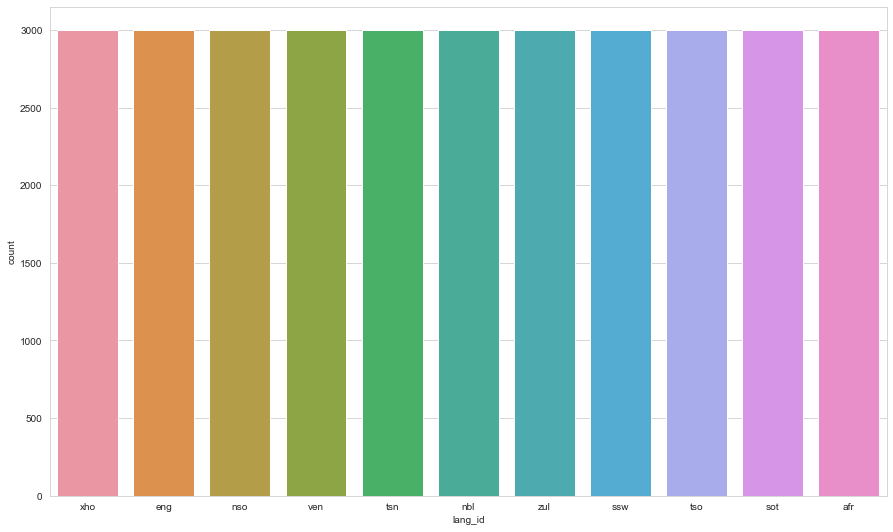

In [8]:
#Before balancing our data
fig = plt.figure(figsize=(15,9));
sns.set_style('whitegrid')
sns.countplot(x='lang_id', data=df)

**Observations:**
1. All the languages distribution were the same showing that our Dataset is balanced.

In [30]:
# create a wordcloud
text = " ".join(cat.split()[0] for cat in df.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

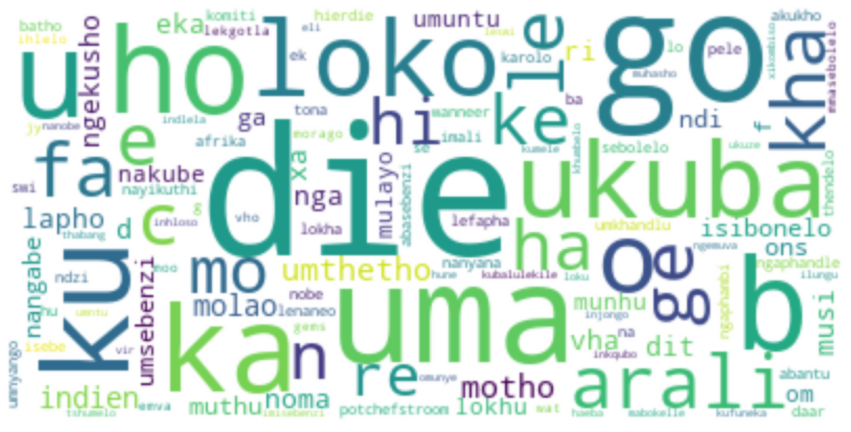

In [31]:
fig = plt.figure(figsize=(15,9));
plt.imshow(word_cloud, interpolation='gaussian')
plt.axis("off")
plt.show()

## 4. Data Preprocessing / Feature Engineering and Selection

In [4]:
df.text[0]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

I started with removing all website, possibly emails even though i doubt that the text would contain emails, punctuations, numbers, commas and any special characters

In [5]:
def remove_website(text):
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", text)
    return text

def remove_email(text):
    text = re.sub(r"@[\w\.-]+", "", text)
    return text

In [6]:
q=df['text']

In [7]:
df['text']=df['text'].apply (lambda q: remove_website(q))

In [8]:
df['text']=df['text'].apply (lambda q: remove_email(q))

In [9]:
df.text[0]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

In [10]:
def clean_message(text):
    text=text.lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub(r"@\w+",'', text)
    text=re.sub(r"#\w+",'', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\w*\d\w*', '', text)
    text=re.sub('[''""...]','', text)
    text=re.sub('\n','',text)
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    return text

In [11]:
x=df['text']

In [12]:
df['text']=df['text'].apply (lambda x: clean_message(x))

In [13]:
df.text[0]

'umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

In [14]:
def remove_stopwords(text):
    stop = stopwords.words('english')
    text = " ".join([word for word in text.split() if word not in (stop)])
    return text

In [15]:
p=df['text']

In [16]:
df['text']=df['text'].apply (lambda p: remove_stopwords(p))

In [17]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [18]:
l=df['text']

In [19]:
df['text']=df['text'].apply (lambda p: cleaning_repeating_char(p))

I Tokenized my text in other to be able to pass it through stemmization and lemmatization

In [21]:
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['text'].apply(tokeniser.tokenize)

In [22]:
df

,lang_id,text,tokens
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,province kwazulunatal department transport inv...,"[province, kwazulunatal, department, transport..."
3,nso,netefata gore ba file dilo ka moka te le dumel...,"[netefata, gore, ba, file, dilo, ka, moka, te,..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,"[popo, ya, dipolateforomo, tse, ke, go, tlisa,..."
32996,sot,modise mosadi na ntse sa utlwe hore thabang ra...,"[modise, mosadi, na, ntse, sa, utlwe, hore, th..."
32997,eng,closing date submission completed tenders augu...,"[closing, date, submission, completed, tenders..."
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,"[nawuphina, umntu, ofunyenwe, enetyala, phants..."


In [23]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

In [24]:
o=df['tokens']

In [25]:
df['stemmer']=df['tokens'].apply (lambda o: stemming_on_text(o))

In [26]:
df

,lang_id,text,tokens,stemmer
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,province kwazulunatal department transport inv...,"[province, kwazulunatal, department, transport...","[province, kwazulunatal, department, transport..."
3,nso,netefata gore ba file dilo ka moka te le dumel...,"[netefata, gore, ba, file, dilo, ka, moka, te,...","[netefata, gore, ba, file, dilo, ka, moka, te,..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."
...,...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,"[popo, ya, dipolateforomo, tse, ke, go, tlisa,...","[popo, ya, dipolateforomo, tse, ke, go, tlisa,..."
32996,sot,modise mosadi na ntse sa utlwe hore thabang ra...,"[modise, mosadi, na, ntse, sa, utlwe, hore, th...","[modise, mosadi, na, ntse, sa, utlwe, hore, th..."
32997,eng,closing date submission completed tenders augu...,"[closing, date, submission, completed, tenders...","[closing, date, submission, completed, tenders..."
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,"[nawuphina, umntu, ofunyenwe, enetyala, phants...","[nawuphina, umntu, ofunyenwe, enetyala, phants..."


In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
def diana_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [29]:
df['lemma'] = df['stemmer'].apply(diana_lemma, args=(lemmatizer, ))

In [30]:
df.head()

,lang_id,text,tokens,stemmer,lemma
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,province kwazulunatal department transport inv...,"[province, kwazulunatal, department, transport...","[province, kwazulunatal, department, transport...","[province, kwazulunatal, department, transport..."
3,nso,netefata gore ba file dilo ka moka te le dumel...,"[netefata, gore, ba, file, dilo, ka, moka, te,...","[netefata, gore, ba, file, dilo, ka, moka, te,...","[netefata, gore, ba, file, dilo, ka, moka, te,..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [31]:
df['clean_text']=df['lemma'].apply(lambda tokens: " ".join(map(str, tokens)))

In [32]:
df.head()

,lang_id,text,tokens,stemmer,lemma,clean_text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...",umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...",idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,province kwazulunatal department transport inv...,"[province, kwazulunatal, department, transport...","[province, kwazulunatal, department, transport...","[province, kwazulunatal, department, transport...",province kwazulunatal department transport inv...
3,nso,netefata gore ba file dilo ka moka te le dumel...,"[netefata, gore, ba, file, dilo, ka, moka, te,...","[netefata, gore, ba, file, dilo, ka, moka, te,...","[netefata, gore, ba, file, dilo, ka, moka, te,...",netefata gore ba file dilo ka moka te le dumel...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...


## 5. Model Selection

Splitting my Dataset to independent and dependent variables

In [34]:
X=df.clean_text.values
y=df.lang_id.values

Utilizing the variables to train and test split system, where my training data takes 80% of the Dataset while my test data takes 20%

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X , y, stratify=y,
                                                       test_size =0.2, 
                                                       random_state=42)

Converting my variables to a vector form for easy model. To do this, i decided to use the TfidVectorizer. Term frequency-inverse document frequency (TfidVectorizer) is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

In [37]:
Vectorize = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')
X_train = Vectorize.fit_transform(X_train)
X_test = Vectorize.transform(X_test)

For this project i decided to use the following machine learning models:
1. Naive-Bayes Multinomial
2. RandomForestClassifier
3. LinearSVC

In [38]:
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print("The accuracy score of the KNeighborsClassifier is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test,y_pred))

The accuracy score of the KNeighborsClassifier is: 0.9993939393939394


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       600
         eng       1.00      1.00      1.00       600
         nbl       1.00      1.00      1.00       600
         nso       1.00      1.00      1.00       600
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       600
         tsn       1.00      1.00      1.00       600
         tso       1.00      1.00      1.00       600
         ven       1.00      1.00      1.00       600
         xho       1.00      1.00      1.00       600
         zul       1.00      1.00      1.00       600

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [39]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=50)
rf_model=rf_classifier.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("The accuracy score of the RandomForestClassifier is:", accuracy_score(y_test, rf_predictions))
print("\n\nClassification Report:\n\n", classification_report(y_test, rf_predictions))

The accuracy score of the RandomForestClassifier is: 0.9968181818181818


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       600
         eng       1.00      1.00      1.00       600
         nbl       1.00      0.99      0.99       600
         nso       1.00      1.00      1.00       600
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       600
         tsn       1.00      1.00      1.00       600
         tso       1.00      1.00      1.00       600
         ven       1.00      1.00      1.00       600
         xho       0.99      0.99      0.99       600
         zul       0.98      0.99      0.99       600

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [40]:
Lsvc=LinearSVC(random_state=42)
Linear_svc=Lsvc.fit(X_train, y_train)
y_pred_1 = Lsvc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred_1))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_1))

The accuracy score of the SVC is: 0.9993939393939394


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       600
         eng       1.00      1.00      1.00       600
         nbl       1.00      1.00      1.00       600
         nso       1.00      1.00      1.00       600
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       600
         tsn       1.00      1.00      1.00       600
         tso       1.00      1.00      1.00       600
         ven       1.00      1.00      1.00       600
         xho       1.00      1.00      1.00       600
         zul       1.00      1.00      1.00       600

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



After carefully selecting and running and fine tunning my models, i decide to stack all the models together for a better result.

**Stacking:** 
Stacking is a way of ensembling classification or regression models it consists of two-layer estimators. The first layer consists of all the baseline models that are used to predict the outputs on the test datasets. The second layer consists of Meta-Classifier or Regressor which takes all the predictions of baseline models as an input and generate new predictions.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200713234827/mlxtend.PNG" alt="">

In [41]:
RC = RidgeClassifier()

In [46]:
multiNB1 = MultinomialNB(alpha=0.1)
Lsvc=LinearSVC(random_state=42)

estimators = [('multiNB1', multiNB1), ('Lsvc', Lsvc)]
final_est = RidgeClassifier(alpha=0.2125)

In [47]:
stacking_NB3 = StackingClassifier(estimators = estimators,
                           final_estimator = final_est,
                           passthrough = True)

In [48]:
confirm_stacking=stacking_NB3.fit(X_train , y_train)

In [49]:
pred = confirm_stacking.predict(X_test)

print("The accuracy score of the Stacking is:", accuracy_score(y_test, pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, pred))

The accuracy score of the Stacking is: 0.9993939393939394


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       600
         eng       1.00      1.00      1.00       600
         nbl       1.00      1.00      1.00       600
         nso       1.00      1.00      1.00       600
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       600
         tsn       1.00      1.00      1.00       600
         tso       1.00      1.00      1.00       600
         ven       1.00      1.00      1.00       600
         xho       1.00      1.00      1.00       600
         zul       1.00      1.00      1.00       600

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



## 6. Submission

**First loading the test data**

In [50]:
test_df =pd.read_csv('test_set.csv') # load the data
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [51]:
test_df.text[4]

'Winste op buitelandse valuta.'

**Applying all data preprocessing to my test data**

In [53]:
j=test_df['text']

In [54]:
test_df['text']=test_df['text'].apply (lambda j: remove_website(j))

In [55]:
test_df['text']=test_df['text'].apply (lambda j: remove_email(j))

In [56]:
test_df['text']=test_df['text'].apply (lambda j: clean_message(j))

In [57]:
#test_df['message']=test_df['message'].apply (lambda j: remove_unique_char1(j))

In [58]:
test_df['text']=test_df['text'].apply (lambda j: remove_stopwords(j))

In [59]:
test_df['text']=test_df['text'].apply (lambda j: cleaning_repeating_char(j))

In [60]:
test_df.text[4]

'winste op buitelandse valuta'

In [61]:
tokeniser = TreebankWordTokenizer()
test_df['tokens'] = test_df['text'].apply(tokeniser.tokenize)

In [62]:
r=test_df['text']

In [63]:
test_df['stemmer']=test_df['tokens'].apply (lambda r: stemming_on_text(r))

In [64]:
test_df['lemma'] = test_df['stemmer'].apply(diana_lemma, args=(lemmatizer, ))

In [65]:
test_df['clean_text']=test_df['lemma'].apply(lambda tokens: " ".join(map(str, tokens)))

In [66]:
test_df

,index,text,tokens,stemmer,lemma,clean_text
0,1,mmasepala fa maemo kgethegileng letlelela kgat...,"[mmasepala, fa, maemo, kgethegileng, letlelela...","[mmasepala, fa, maemo, kgethegileng, letlelela...","[mmasepala, fa, maemo, kgethegileng, letlelela...",mmasepala fa maemo kgethegileng letlelela kgat...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...","[uzakwaziswa, ngokufaneleko, nakungafuneka, em...","[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]","[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]","[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...","[kube, inja, nelikati, betingevakala, kutsi, t...","[kube, inja, nelikati, betingevakala, kutsi, t...",kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]","[winste, op, buitelandse, valuta]","[winste, op, buitelandse, valuta]",winste op buitelandse valuta
...,...,...,...,...,...,...
5677,5678,mark ballot private,"[mark, ballot, private]","[mark, ballot, private]","[mark, ballot, private]",mark ballot private
5678,5679,ge ka kgetha ka bowena go se omie mofani ka ti...,"[ge, ka, kgetha, ka, bowena, go, se, omie, mof...","[ge, ka, kgetha, ka, bowena, go, se, omie, mof...","[ge, ka, kgetha, ka, bowena, go, se, omie, mof...",ge ka kgetha ka bowena go se omie mofani ka ti...
5679,5680,e ka kopo etsa kgetho ya hao ka hloko hobane h...,"[e, ka, kopo, etsa, kgetho, ya, hao, ka, hloko...","[e, ka, kopo, etsa, kgetho, ya, hao, ka, hloko...","[e, ka, kopo, etsa, kgetho, ya, hao, ka, hloko...",e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680,5681,tb ke bokudi ba pmb mme morero tla lefella tlh...,"[tb, ke, bokudi, ba, pmb, mme, morero, tla, le...","[tb, ke, bokudi, ba, pmb, mme, morero, tla, le...","[tb, ke, bokudi, ba, pmb, mme, morero, tla, le...",tb ke bokudi ba pmb mme morero tla lefella tlh...


**Aplying TfidVectorizer**

In [67]:
X = test_df['clean_text']
new = Vectorize.transform(X)

**Predicting the type fo language from the text**

In [68]:
test_df['lang_id'] = confirm_stacking.predict(new)

In [ ]:
submission = test_df[['index', 'lang_id','text']]
submission.to_csv('Oladotun_Jonibola8.csv',index=False)
submission